In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
def ignore_warn(*args, **kwargs): pass
warnings.warn = ignore_warn 

In [3]:
df = pd.read_csv('plz_final.csv', encoding = 'UTF-8')

In [4]:
df_new = pd.get_dummies(df, columns = ['time'])

In [5]:
y  = df_new['val']
X = df_new.drop(['stn_nm', 'bis_id', 'total_cnt', 'now_lat', 'now_lon'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
# 1. LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
y_pred = l_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('LinearRegression RMSE:', RMSE)

# 2. Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Ridge RMSE:', round(RMSE, 6))

# 3. Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Lasso RMSE:', round(RMSE, 6))

# 4. ElasticNet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
en_reg = ElasticNet()
en_reg.fit(X_train, y_train)
y_pred = en_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('ElasticNet RMSE:', round(RMSE, 6))

# 5. Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Decision Tree RMSE:', round(RMSE, 6))

# 6. Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Random Forest RMSE:', round(RMSE, 6))

# 7. Gradient Boost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
gbm_reg = GradientBoostingRegressor()
gbm_reg.fit(X_train, y_train)
y_pred = gbm_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('Gradient Boost RMSE:', round(RMSE, 6))

# 8. XGBoost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('XGBoost RMSE:', round(RMSE, 6))

LinearRegression RMSE: 6.898555579533459e-13
Ridge RMSE: 0.004099
Lasso RMSE: 0.12955
ElasticNet RMSE: 0.129392
Decision Tree RMSE: 0.002619
Random Forest RMSE: 0.00181
Gradient Boost RMSE: 0.002118
XGBoost RMSE: 0.002666


In [7]:
# 9. LightGBM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train, y_train)
y_pred = lgbm_reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', round(RMSE, 6))

RMSE: 0.012143


In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
# Random Forest

# (1) Grid Search
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

params = {'min_impurity_decrease' : [0.000001, 0.000002, 0.000003, 0.000004, 0.000005]}

gs1 = GridSearchCV(RandomForestRegressor(random_state = 42), params)
gs1.fit(X_train, y_train)

print(gs1.best_params_)

{'min_impurity_decrease': 2e-06}


In [11]:
#### 1. h2o 분석 준비하기 ####
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
%matplotlib inline
h2o.init()
h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "19.0.2" 2023-01-17; Java(TM) SE Runtime Environment (build 19.0.2+7-44); Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from /Users/idohyeong/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/lq/yg0pscr5437892j00_r823f40000gn/T/tmpns4cdr76
  JVM stdout: /var/folders/lq/yg0pscr5437892j00_r823f40000gn/T/tmpns4cdr76/h2o_idohyeong_started_from_python.out
  JVM stderr: /var/folders/lq/yg0pscr5437892j00_r823f40000gn/T/tmpns4cdr76/h2o_idohyeong_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_idohyeong_spshxo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [12]:
#### 2. 데이터 불러오기 ####
data_df = pd.read_csv('plz_final.csv')
data_df.head()
# 데이터 확인
data_df.describe()

# var2~는 입력 feature
feature = data_df.drop('time', axis=1)
feature.describe()

# var1은 label
label = data_df['time']
label.describe()

count    2427.000000
mean       13.763082
std         4.759716
min         5.000000
25%        10.000000
50%        14.000000
75%        18.000000
max        23.000000
Name: time, dtype: float64

In [13]:
################################################################
## make dataset
# Identify the response and set of predictors
y = "time"
x = list(data_df.columns)  #if x is defined as all columns except the response, then x is not required
x.remove(y)

# data_df을 8:2로 나눈다, 50 : 13
train, valid = train_test_split(data_df,
                                test_size=0.2, 
                                shuffle=True)
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

# For binary classification, response should be a factor
h2o_train[y] = h2o_train[y].asfactor()
h2o_valid[y] = h2o_valid[y].asfactor()

In [14]:

################################################################    
## Run AutoML for 120 seconds
max_runtime_secs = 120  # Or any other desired value
aml = H2OAutoML(max_runtime_secs=max_runtime_secs, exclude_algos =['XGBoost', 'StackedEnsemble'])
aml.train(x = x, y = y, training_frame=h2o_train, leaderboard_frame=h2o_valid)


12:10:55.65: GLM_1_AutoML_1_20230929_121052 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 186 out of bounds for length 186



Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_1_20230929_121052


Status of Neuron Layers: predicting time, 19-class classification, multinomial distribution, CrossEntropy loss, 2,309 weights/biases, 36.4 KB, 20,196 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight              weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  -----------------------  -------------------  --------------------  -------------------
    1        187      Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.10205998605913744    0.29867255687713623    0.0         -0.00024245766465253566  0.09989389777183533  0.1884969429053937    0.389121413230896
    3        10       Rectifier  0.0        0.0   0.0   0.0020708921004552396  0.0009056052658706903  0.0         -0.029709389093331994    0.25582706928253174  0.89056270350951      0.09619104862213135
    4        10       Rectifier  0.0        0.0   0.0   0.0013041694642743095  0.0008917562663555145  0.0         -0.06760836489964277     0.321586012840271    0.9276791673439397    0.05891837179660797
    5        19       Softmax               0.0   0.0   0.0042177658895716855  0.00318821519613266    0.0         -0.10671760567807054     1.000070571899414    -0.19857419473337093  0.170909583568573

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.8854996584666124
RMSE: 0.9410099141170684
LogLoss: 2.8985158037920282
Mean Per-Class Error: 0.946770297434316
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
5    6    7    8    9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    Error     Rate
---  ---  ---  ---  ---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  --------  -------------
0    0    0    0    0    0     0     0     0     0     0     2     0     0     0     0     0     0     0     1         2 / 2
0    1    0    0    0    0     0     0     1     0     0     106   0     0     0     0     0     0     0     0.990741  107 / 108
0    0    0    0    0    0     0     0     0     1     0     118   0     0     0     0     0     0     0     1         119 / 119
0    0    0    0    0    1     0     0     2     1     0     113   0     0     0     0     0     0     0     1         117 / 117
0    0    0    0    0    1     0     0     0     1     0     115   0     0     0     0     0     0     0     1         117 / 117
0    0    0    0    0    0     0     0     2     1     0     126   0     0     0     0     0     0     0     1         129 / 129
0    0    0    0    0    1     0     0     1     0     0     117   0     0     0     0     0     0     0     1         119 / 119
0    0    0    0    0    0     0     1     2     1     0     104   0     0     0     0     0     0     0     0.990741  107 / 108
0    2    0    0    0    0     0     1     1     0     0     115   0     0     0     0     0     0     0     0.991597  118 / 119
0    0    0    0    0    0     0     1     1     1     0     121   0     0     0     0     0     0     0     0.991935  123 / 124
0    0    0    0    0    0     0     0     1     1     0     124   0     0     0     0     0     0     0     1         126 / 126
0    0    0    0    0    0     0     1     1     1     0     124   0     0     0     0     0     0     0     0.023622  3 / 127
0    0    0    0    0    0     0     2     1     1     0     117

In [16]:
## save metric
# Print Leaderboard (ranked by xval metrics)
leaderboard = aml.leaderboard
performance = aml.leader.model_performance(h2o_valid)  # (Optional) Evaluate performance on a test set

model_id   =aml.leader.model_id  # 최고 모델 명
accuracy   =performance.accuracy()  # 정확도
precision  =performance.precision()  # precision
recall     =performance.recall()  # recall
F1         =performance.F1()  # f1
auc        =performance.auc()  # auc
variable_importance=aml.leader.varimp()  # 중요한 입력 변수

print(model_id, accuracy, precision, recall, F1, auc, variable_importance)
print(performance)

AttributeError: type object 'MetricsBase' has no attribute 'accuracy'

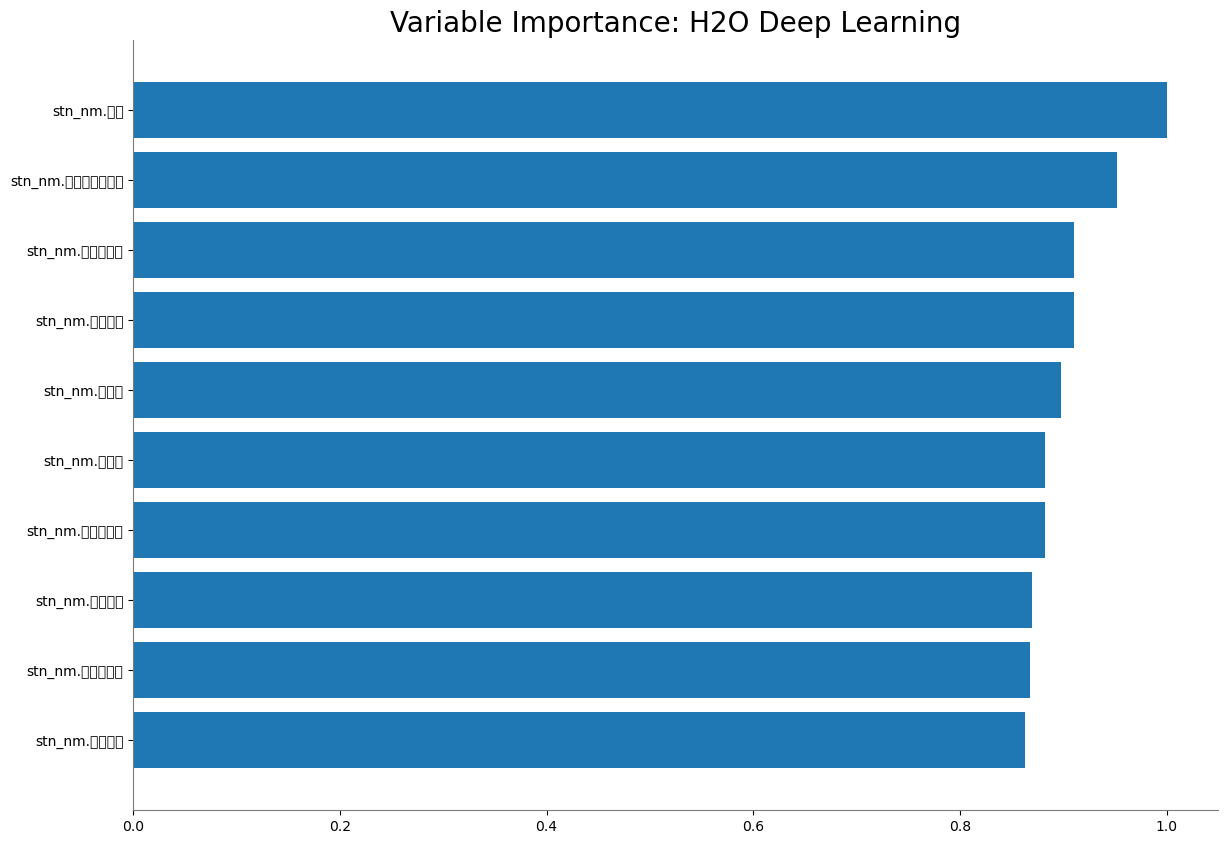

  predict
       16
       16
       16
       16
       16
       16
       16
       16
       16
       16
[486 rows x 1 column]

  time
    17
    18
    17
    19
     8
    15
    16
    19
    18
     6
[486 rows x 1 column]



<Figure size 640x480 with 0 Axes>

In [18]:
## 중요 변수 시각화
aml.leader.varimp_plot()

## automl 결과 확인
# Get AutoML object by `project_name`
get_aml = h2o.automl.get_automl(aml.project_name)
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
label_predicted = get_aml.predict(h2o_valid)
print(label_predicted['predict'])
print(h2o_valid['time'])